In [2]:
!pip3 install openpyxl

In [3]:
import pandas as pd

data=pd.read_excel('C:/Users/tyumi/오뚜기_통신_클러스터링.xlsx')

In [4]:
data.columns #4분위수 및 미추정, 없는 포함된 변수명 삭제

Index(['성별', '연령대', '총인구수', '1인가구수', '야간상주지 변경 미추정 인구 수', '야간상주지 변경횟수 평균',
       '야간상주지 변경횟수: 4분위수, 25%', '야간상주지 변경횟수: 4분위수, 50%',
       '야간상주지 변경횟수: 4분위수, 75%', '주간상주지 변경 미추정 인구수',
       ...
       '배달_브랜드 서비스 사용 미추정 인구수', '배달_브랜드 서비스 사용일수',
       '배달_브랜드 서비스 사용일수: 4분위수, 25%', '배달_브랜드 서비스 사용일수: 4분위수, 50%',
       '배달_브랜드 서비스 사용일수: 4분위수, 75%', '배달_식재료 서비스 사용 미추정 인구수',
       '배달_식재료 서비스 사용일수', '배달_식재료 서비스 사용일수: 4분위수, 25%',
       '배달_식재료 서비스 사용일수: 4분위수, 50%', '배달_식재료 서비스 사용일수: 4분위수, 75%'],
      dtype='object', length=140)

In [5]:
aa=[]
for i in data.columns:
     if '4분위수' not in i and '미추정' not in i and '없는' not in i and '야간상주지 변경횟수 평균' not in i and '주간상주지 변경횟수 평균' not in i:
            aa.append(i)

In [6]:
data=data[aa]

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc,rcParams
import seaborn as sns

In [8]:
path='C:/Users/tyumi/NanumGothic.ttf'
font_name=font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)
print(font_name)

rcParams['axes.unicode_minus'] = False
fontprop=font_manager.FontProperties(fname=path,size=12)

NanumGothic


In [9]:
#정규화

from sklearn.preprocessing import MinMaxScaler

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [10]:
!pip3 install yellowbrick

C:\Users\tyumi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tyumi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tyumi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tyumi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

C:\Users\tyumi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tyumi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=29), k=(1, 30))

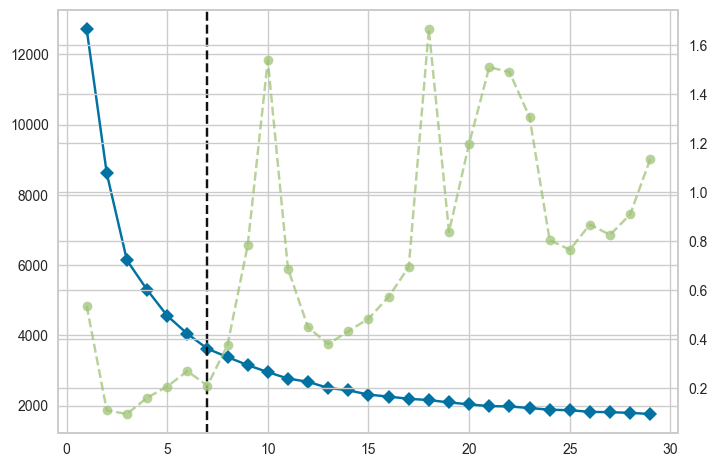

In [12]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,30))
visualizer.fit(data_scale)

In [14]:
print(visualizer.elbow_value_ )

7


In [15]:
from sklearn.cluster import KMeans

k = 7

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
data['cluster'] = model.fit_predict(data_scale)

C:\Users\tyumi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tyumi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [48]:
##향후계획

##BOXPlOT
##cluster별 데이터 저장

##두 변수간의 비교 수행하기 

array([1.67, 0.  ])

In [16]:
data

,성별,연령대,총인구수,1인가구수,평균 출근 소요시간 평균,평균 근무시간 평균,소액결재 비사용 인구수,소액결재 사용횟수 평균,소액결재 사용금액 평균,최근 3개월 내 요금 연체 비율,...,게임 서비스 사용일수,금융 서비스 사용일수,쇼핑 서비스 사용일수,동영상/방송 서비스 사용일수,유튜브 사용일수,넷플릭스 사용일수,배달 서비스 사용일수,배달_브랜드 서비스 사용일수,배달_식재료 서비스 사용일수,cluster
0,1,20,220.00,68.91,89.09,536.34,220.00,0.00,6500.00,8.89,...,74.16,96.40,108.96,39.24,0.24,-0.18,14.34,2.71,1.67,2
1,1,25,321.00,111.76,52.00,580.46,299.46,2.33,7189.19,6.04,...,71.15,137.81,157.28,46.97,0.22,-0.15,18.88,2.82,1.67,2
2,1,30,350.23,112.44,43.93,522.67,324.44,2.94,6872.15,11.69,...,61.57,149.82,178.59,47.49,0.13,-0.18,20.59,2.85,1.67,2
3,1,35,353.00,111.49,62.00,556.96,336.50,2.50,6542.37,5.61,...,57.91,147.34,180.28,46.21,0.05,-0.18,18.32,3.46,1.67,2
4,1,40,419.00,77.91,68.21,546.73,408.05,2.22,5823.13,7.83,...,54.41,143.42,185.52,44.21,-0.02,-0.23,17.76,2.50,1.67,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,2,55,2324.35,298.95,55.81,494.03,2259.47,2.35,6269.57,7.78,...,43.86,75.29,127.95,20.13,-0.15,-0.54,11.27,3.15,1.67,6
10172,2,60,1596.71,216.98,54.87,467.78,1577.03,2.42,5523.81,6.78,...,42.01,53.28,93.19,18.39,-0.15,-0.60,10.48,3.00,1.67,6
10173,2,65,1092.49,183.82,56.75,470.36,1084.10,2.62,4641.51,4.71,...,40.24,42.61,74.90,15.47,-0.18,-0.62,8.19,1.67,1.67,6
10174,2,70,814.12,131.63,0.00,0.00,812.68,1.67,3125.00,3.89,...,33.52,27.67,44.25,13.14,-0.27,-0.64,6.32,1.67,0.00,5


In [18]:
data.to_csv('cluster_0801.csv',index=False)